In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

results_df = pd.read_csv(zf.open('results.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))
lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
races_df = pd.read_csv(zf.open('races.csv'))

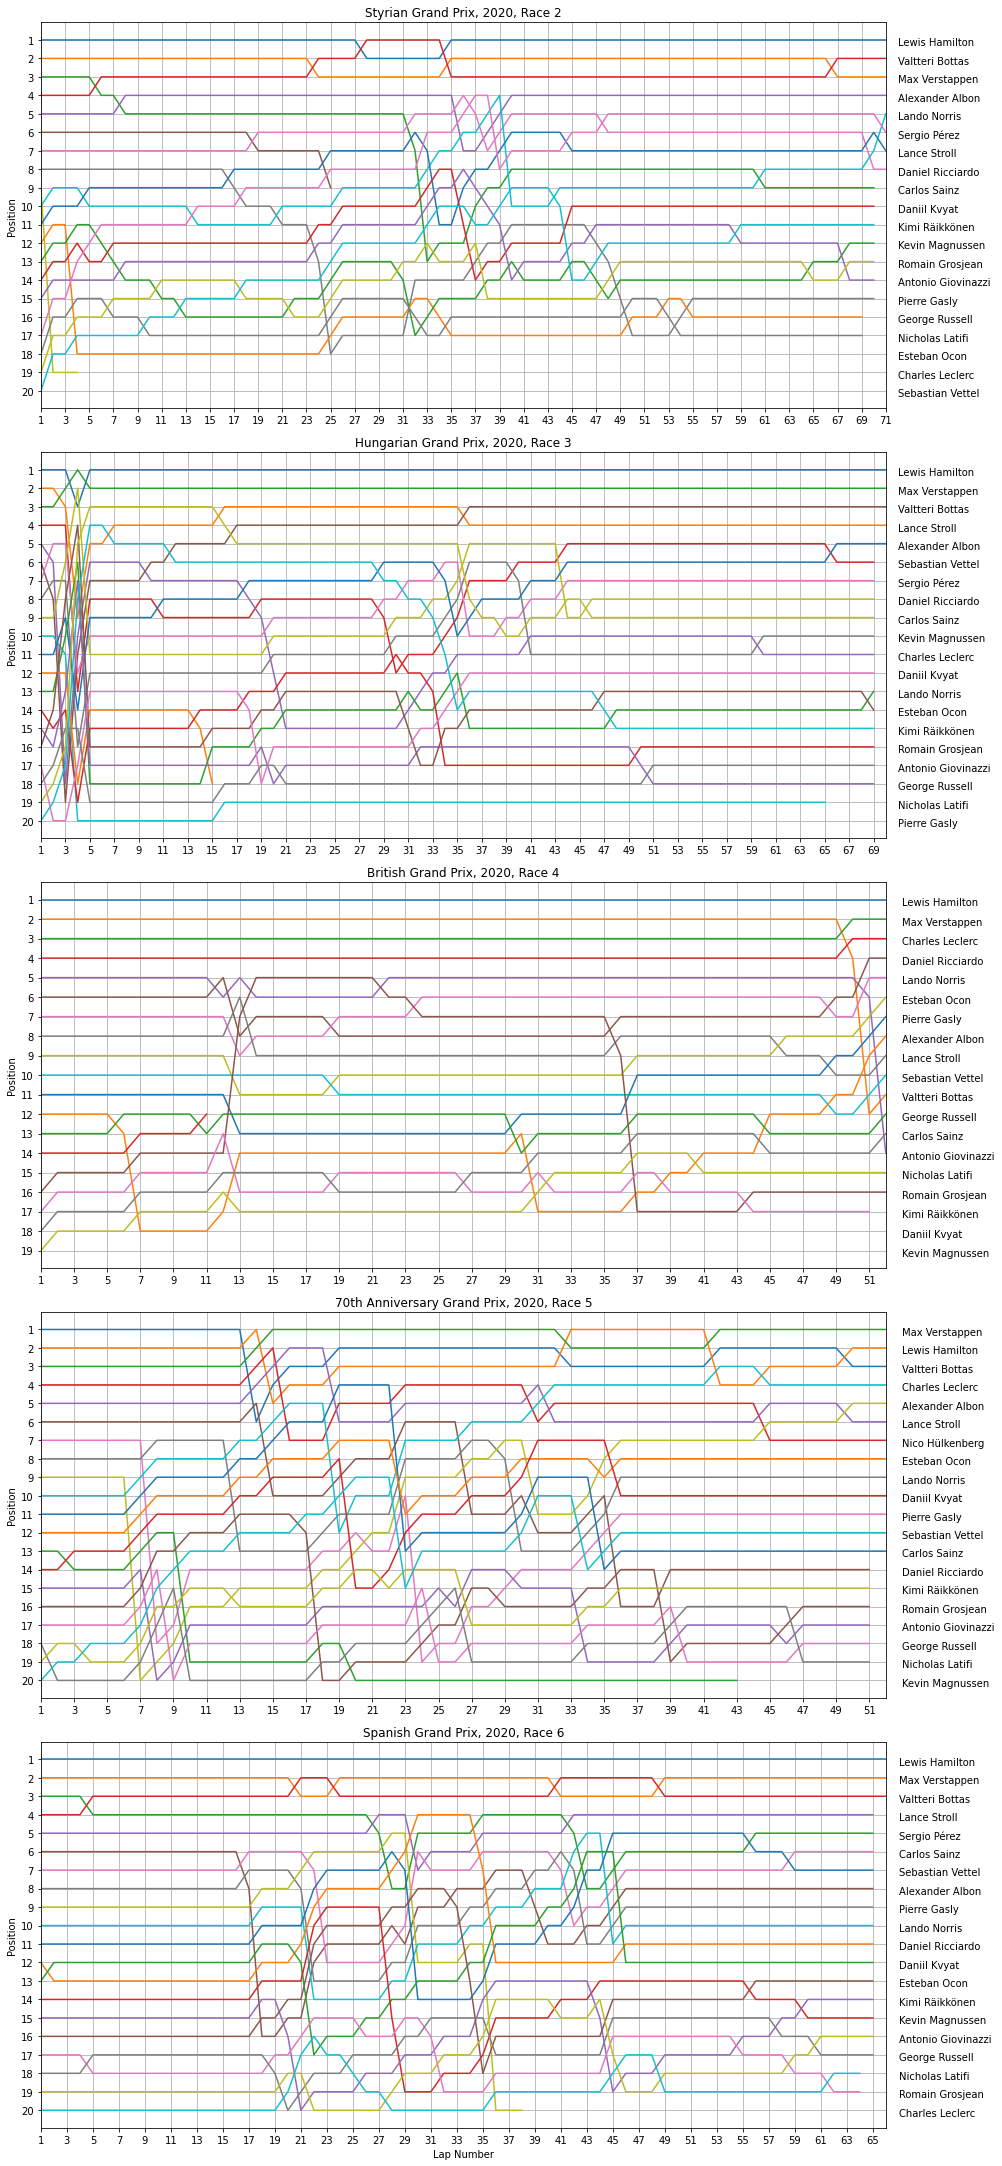

In [2]:
plt.figure(figsize=(14, 5 * 6))    

for plot_num, raceId in enumerate(lap_times_df.raceId.drop_duplicates().iloc[-5:]):
    plt.subplot(5, 1, plot_num + 1)
    race_df = lap_times_df[lap_times_df["raceId"] == raceId]
    driver_list = race_df["driverId"].drop_duplicates()
    
    for driver in driver_list:
        plt.plot(race_df[race_df["driverId"] == driver]["lap"],
                 race_df[race_df["driverId"] == driver]["position"])
        y_pos = results_df[(results_df["raceId"] == raceId) & (results_df["driverId"] == driver)]["positionOrder"] + 0.3
        driver_info = drivers_df[drivers_df["driverId"] == driver]
        driver_name = driver_info["forename"] + ' ' + driver_info["surname"]
        plt.text(race_df["lap"].values.max() + 1, y_pos, driver_name.iloc[0])

    plt.xticks(np.arange(race_df["lap"].values.min(), race_df["lap"].values.max() + 1, 2.0))
    plt.yticks(np.arange(race_df["lap"].values.min(), len(driver_list) + 1, 1.0))
    plt.xlim(race_df["lap"].values.min(), race_df["lap"].values.max())
    race_name = races_df[races_df["raceId"] == raceId]["name"].iloc[0]
    race_year = races_df[races_df["raceId"] == raceId]["year"].iloc[0]
    race_round = races_df[races_df["raceId"] == raceId]["round"].iloc[0]
    plt.grid()
    plt.gca().invert_yaxis()
    plt.title(str(race_name) + ', ' + str(race_year) + ', Race ' + str(race_round))
    plt.ylabel('Position')
    
plt.tight_layout()
plt.xlabel('Lap Number')
plt.show()